In [1]:
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
%matplotlib inline

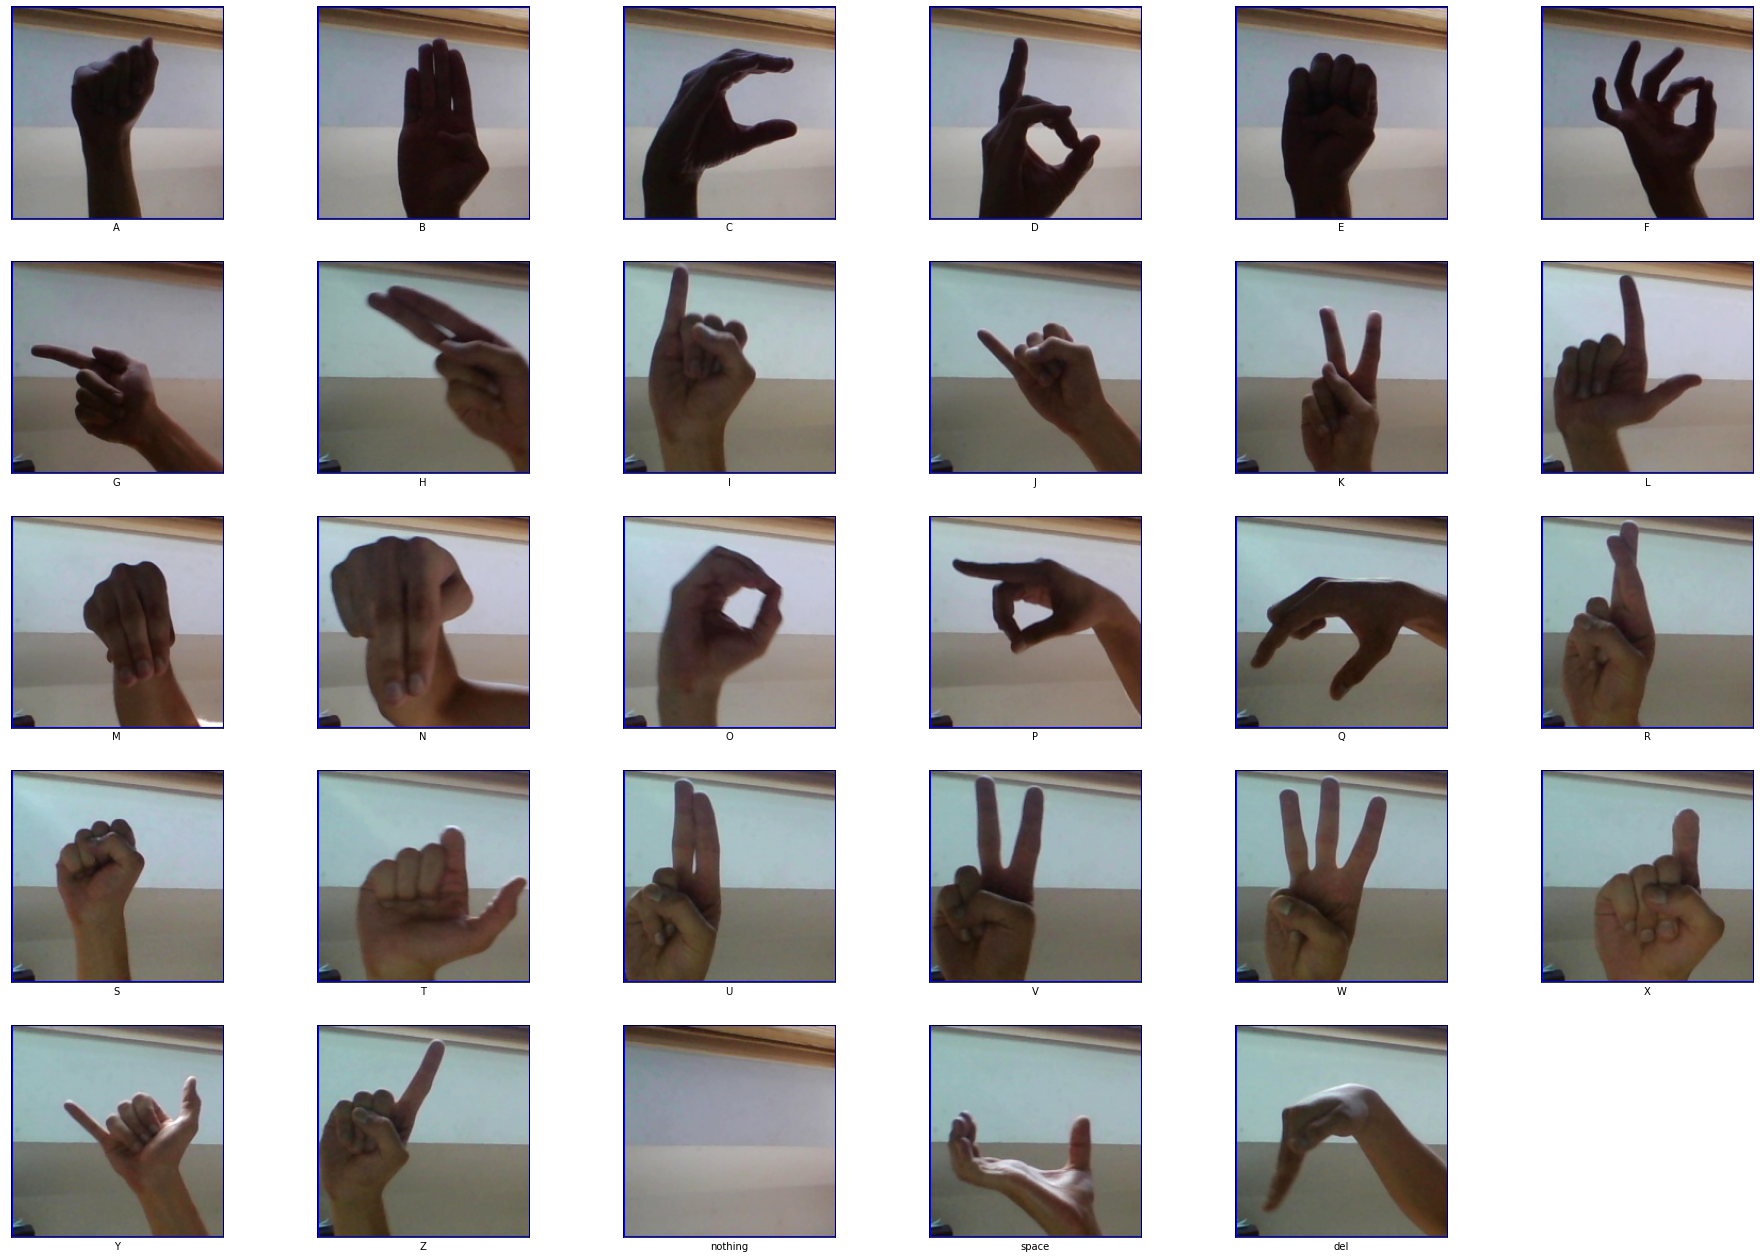

In [2]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(32, 32))
for i in range (0,29):
    plt.subplot(7,6,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [3]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in tqdm(os.listdir(train_dir),desc='Overall Progress'):
        index +=1
        print('Folder : '+classes[index])
        for image in tqdm(os.listdir(train_dir + "/" + folder)):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_dir)
print('Loading:', time() - start)

Overall Progress:   0%|          | 0/29 [00:00<?, ?it/s]

Folder : A


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : B


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : C


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : D


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : E


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : F


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : G


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : H


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : I


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : J


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : K


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : L


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : M


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : N


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : O


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : P


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : Q


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : R


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : S


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : T


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : U


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : V


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : W


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : X


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : Y


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : Z


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : nothing


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : space


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : del


  0%|          | 0/3000 [00:00<?, ?it/s]

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)
Loading: 532.4656493663788


In [4]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(512, activation='sigmoid'))
model.add(Dense(29, activation='softmax'))

In [ ]:
classes = 29
batch = 128
epochs = 6
learning_rate = 0.0001

model.summary()

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

start = time()
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
train_time = time() - start
print('\nTrain time: ', train_time)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)